#### **1. Data Collection:**
#####        The **flipkart_fashion_products** dataset taken from the kaggle. The dataset contains the data about flipkart order details.

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
import pandas as pd
dt = pd.read_excel("C:/Users/keerthana/Desktop/Data Engineering/output.xlsx")
dt.head(2)

,Unnamed: 0,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:51",69% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",66% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...


#### 2. Data validation
##### [i] Checking data types of each column
##### [ii] Checking for missing values, duplicates.

In [70]:
# List of columns in the dataset
print(f"Dataset Columns: {dt.columns}")

# remove unwanted columns
dt.drop(['Unnamed: 0', 'discount', 'images', 'out_of_stock', 'product_details', 'sub_category', 'title', "url"], axis=1, inplace=True)

# Appropriate data type for each column 
dt["actual_price"] = dt["actual_price"].str.replace(",", "").astype(float)
dt["selling_price"] = dt["selling_price"].str.replace(",", "").astype(float)
dt["category"] = pd.Categorical(dt["category"])
dt["crawled_at"] = pd.to_datetime(dt["crawled_at"])
print("Data types: ",dt.dtypes)

# Percentage of missing values
dt.isnull().sum()
print(f"actual price: {round(dt["actual_price"].isnull().sum()/len(dt)*100, 2)}%")
print(f"average rating: {round(dt["average_rating"].isnull().sum()/len(dt)*100, 2)}%")
print(f"brand: {round(dt["brand"].isnull().sum()/len(dt)*100, 2)}%")
print(f"description: {round(dt["description"].isnull().sum()/len(dt)*100, 2)}%")
print(f"seller: {round(dt["seller"].isnull().sum()/len(dt)*100, 2)}%")

# Remove rows containing null values present in the average rating column.
dt.dropna(subset=["average_rating"], inplace=True)

# Removing and filling null values based on specific filters
dt["actual_price"] = dt.groupby(["category"])["actual_price"].transform(lambda x: x.fillna(x.mean()))
brand_desc_nulls = dt[
    (dt["brand"].isnull()) & (dt["description"].isnull())
]
dt.drop(brand_desc_nulls.index, inplace=True)


brand_seller_nulls = dt[
    (dt["brand"].isnull()) & (dt["seller"].isnull())
                        ]
print("brand_seller_nulls: ", len(brand_seller_nulls))
dt.drop(brand_seller_nulls.index, inplace=True)

brand_rating_nulls = dt[
    (dt["brand"].isnull()) & (dt["average_rating"].isnull())
]
print("brand_rating_nulls: ", len(brand_rating_nulls))
dt.drop(brand_rating_nulls.index, inplace=True)

avg_rating_nulls = dt[
    dt["average_rating"].isnull()
                      ]
print("avg_rating_nulls: ", len(avg_rating_nulls))
dt.drop(avg_rating_nulls.index, inplace=True)

dt["seller"] = dt.groupby(["category"])["description"].transform(lambda x: x.fillna(x.mode()[0]))
dt["description"] = dt.groupby(["category", "seller"])["description"].transform(lambda x: x.fillna(x.mode()[0]))


brand_nulls = dt[dt["brand"].isnull()]
dt.drop(brand_nulls.index, inplace = True)
print("Null values: \n",dt.isnull().sum())

dt.shape

Dataset Columns: Index(['Unnamed: 0', '_id', 'actual_price', 'average_rating', 'brand',
       'category', 'crawled_at', 'description', 'discount', 'images',
       'out_of_stock', 'pid', 'product_details', 'seller', 'selling_price',
       'sub_category', 'title', 'url'],
      dtype='object')
Data types:  _id                       object
actual_price             float64
average_rating           float64
brand                     object
category                category
crawled_at        datetime64[ns]
description               object
pid                       object
seller                    object
selling_price            float64
dtype: object
actual price: 2.88%
average rating: 8.15%
brand: 6.89%
description: 3.14%
seller: 5.8%
brand_seller_nulls:  81
brand_rating_nulls:  0
avg_rating_nulls:  0
Null values: 
 _id               0
actual_price      0
average_rating    0
brand             0
category          0
crawled_at        0
description       0
pid               0
seller           

C:\Users\keerthana\AppData\Local\Temp\ipykernel_19036\3539650361.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt["actual_price"] = dt.groupby(["category"])["actual_price"].transform(lambda x: x.fillna(x.mean()))
C:\Users\keerthana\AppData\Local\Temp\ipykernel_19036\3539650361.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt["seller"] = dt.groupby(["category"])["description"].transform(lambda x: x.fillna(x.mode()[0]))
C:\Users\keerthana\AppData\Local\Temp\ipykernel_19036\3539650361.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

(25767, 10)

#### 3. EDA

In [71]:
# values counts for categorical data
categories = dt["category"].value_counts()
brands = dt["brand"].value_counts()
descriptions = dt["description"].value_counts()
sellers = dt["seller"].value_counts()

print("categories: \n", categories)
print("\nBrands: \n", brands)
print("\nDescriptions: \n",descriptions)
print("\nsellers: \n", sellers)
dt.drop(["seller"], axis = 1, inplace=True)


categories: 
 category
Clothing and Accessories    24783
Footwear                      984
Bags, Wallets & Belts           0
Toys                            0
Name: count, dtype: int64

Brands: 
 brand
ARBO              993
REEB              991
True Bl           986
Pu                968
ECKO Unl          941
                 ... 
shree khodaldh      1
shivisaa            1
TRANSPERAN          1
K J TRADE           1
ANGI                1
Name: count, Length: 286, dtype: int64

Descriptions: 
 description
60% off    2702
50% off    1855
35% off    1096
63% off     996
57% off     814
           ... 
83% off       7
84% off       7
86% off       2
87% off       1
85% off       1
Name: count, Length: 87, dtype: int64

sellers: 
 seller
60% off    2702
50% off    1855
35% off    1096
63% off     996
57% off     814
           ... 
83% off       7
84% off       7
86% off       2
87% off       1
85% off       1
Name: count, Length: 87, dtype: int64


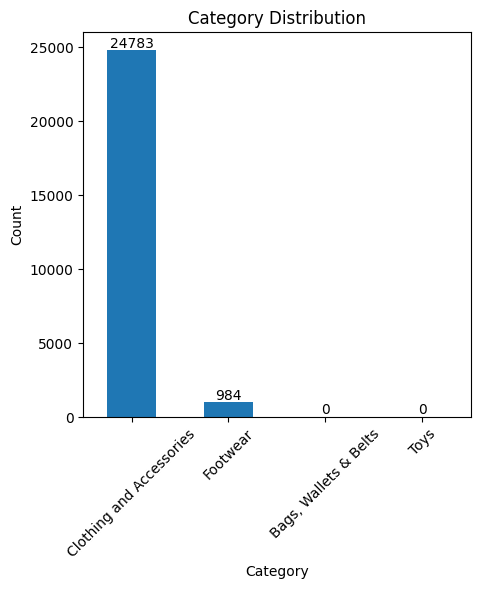

In [72]:
# Plotting a bar graph for categories with value counts
plt.figure(figsize=(5,5))
categories.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(categories):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()


In [18]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


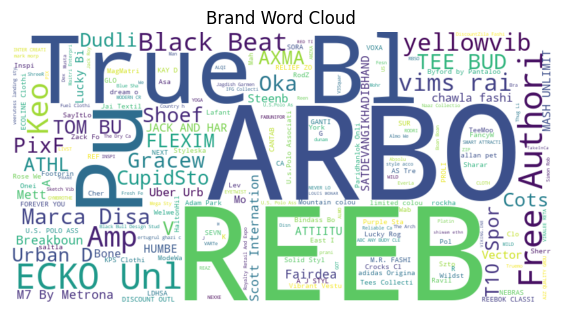

In [73]:
from wordcloud import WordCloud

# Word cloud for brands
brand_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(brands)
plt.figure(figsize=(7,7))
plt.imshow(brand_wordcloud, interpolation='bilinear')
plt.title('Brand Word Cloud')
plt.axis('off')
plt.show()



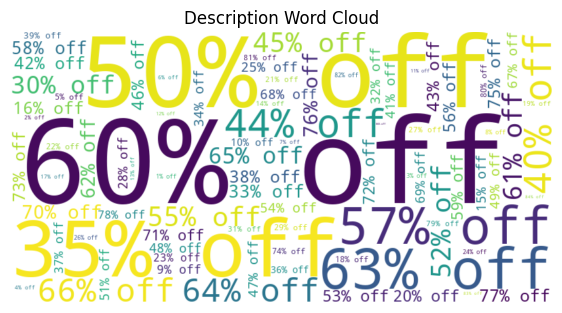

In [74]:
# Word cloud for descriptions
description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(descriptions)
plt.figure(figsize=(7,7))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.title('Description Word Cloud')
plt.axis('off')
plt.show()

#### 4. Data Standardization

In [75]:
# Converting all the string values to lowercase
dt.head(3)
dt["category"] = dt["category"].str.lower()
dt["brand"] = dt["brand"].str.lower()

In [76]:
# Splitting the values in the description column
dt["description"] = dt["description"].str.split(" ").str[0]

In [77]:
# Renaming column names
dt.rename(columns={"Offer_percentage" : "Discount_percentage",
                   "crawled_at" : "Order_date",
                    "_id" : "Customer_ID"}, inplace=True)


In [42]:
dt.head(2)

,Customer_ID,actual_price,average_rating,brand,category,Order_date,Discount_percentage,pid,selling_price
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,2999.0,3.9,york,clothing and accessories,2021-02-10 20:11:51,69%,TKPFCZ9EA7H5FYZH,921.0
1,893e6980-f2a0-531f-b056-34dd63fe912c,1499.0,3.9,york,clothing and accessories,2021-02-10 20:11:52,66%,TKPFCZ9EJZV2UVRZ,499.0


#### 5. Feature Engineering

In [78]:
dt["Order_date"] = pd.to_datetime(dt["Order_date"])
dt["Order Date"] = dt["Order_date"].dt.strftime("%Y/%m/%d")
dt["Order Time"] = dt["Order_date"].dt.strftime("%H:%M:%S")

In [79]:
# Removing Order_date column
dt.drop(["Order_date"], axis=1, inplace=True) 
dt.drop(["Order Time"], axis=1, inplace=True)   

In [80]:
dt.head(3)

,Customer_ID,actual_price,average_rating,brand,category,description,pid,selling_price,Order Date
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,2999.0,3.9,york,clothing and accessories,69%,TKPFCZ9EA7H5FYZH,921.0,2021/02/10
1,893e6980-f2a0-531f-b056-34dd63fe912c,1499.0,3.9,york,clothing and accessories,66%,TKPFCZ9EJZV2UVRZ,499.0,2021/02/10
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,2999.0,3.9,york,clothing and accessories,68%,TKPFCZ9EHFCY5Z4Y,931.0,2021/02/10


In [81]:
# Exporting the cleaned data as .xlsx format
import os
os.getcwd()
dt.to_excel("Cleaned_flipkart_fashion_product.xlsx", index=False)